In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("E:\BlackClover\Machine Learning-A-Z-Codes-Datasets (1)\Machine Learning A-Z (Codes and Datasets)\Part 6 - Reinforcement Learning\Section 32 - Upper Confidence Bound (UCB)\Python\Ads_CTR_Optimisation.csv")
df.shape

(10000, 10)

In [23]:
# N = 500
# d = df.shape[1]
# num_selected_1 = np.array([0] * d)
# num_selected_0 = np.array([0] * d)
# total_rewards  = 0
# ads_selected = []

# for i in range(N):
#     ad = 0 
#     max_random = 0
#     for j in range(d):
#         beta_variate = random.betavariate(num_selected_1[j] + 1, num_selected_0[j] + 1)
#         if beta_variate > max_random:
#             max_random = beta_variate
#             ad = j
#     ads_selected.append(ad)
#     reward = df.values[i, ad]
#     if reward == 1:
#         num_selected_1[ad] += 1
#     else:
#         num_selected_0[ad] += 1
#     total_rewards += reward

In [26]:
N = 10000
d = 10
total_reward = 0
ads_selected = []
o = [0] * d
l = [0] * d

for i in range(N):
    ad = 0
    max_random = 0
    for j in range(d):
        beta_variate = random.betavariate(o[j]+1, l[j]+1)
        if beta_variate > max_random:
            max_random = beta_variate
            ad = j
    ads_selected.append(ad)
    reward = df.values[i, ad]
    if reward == 1:
        l[ad] += 1
    else:
        o[ad] += 1
    total_reward += reward

(array([1.600e+01, 9.000e+00, 3.900e+01, 7.800e+01, 5.000e+00, 9.369e+03,
        8.000e+01, 4.000e+00, 4.000e+00, 3.960e+02]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

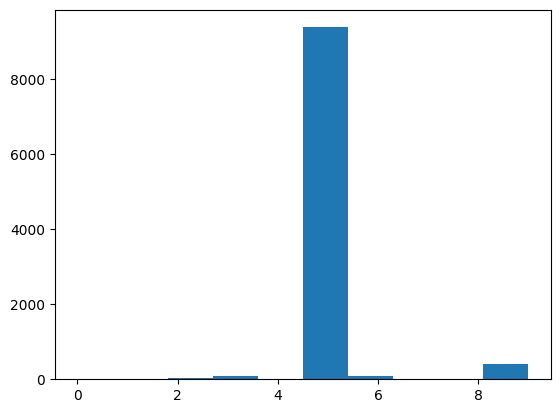

In [27]:
plt.hist(ads_selected)

In [28]:
total_reward

157

In [29]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG